In [4]:
import pandas as pd
import numpy as np
import requests
import time , json
from datetime import datetime, timedelta
from requests import Session
from cryptocmd import CmcScraper
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json



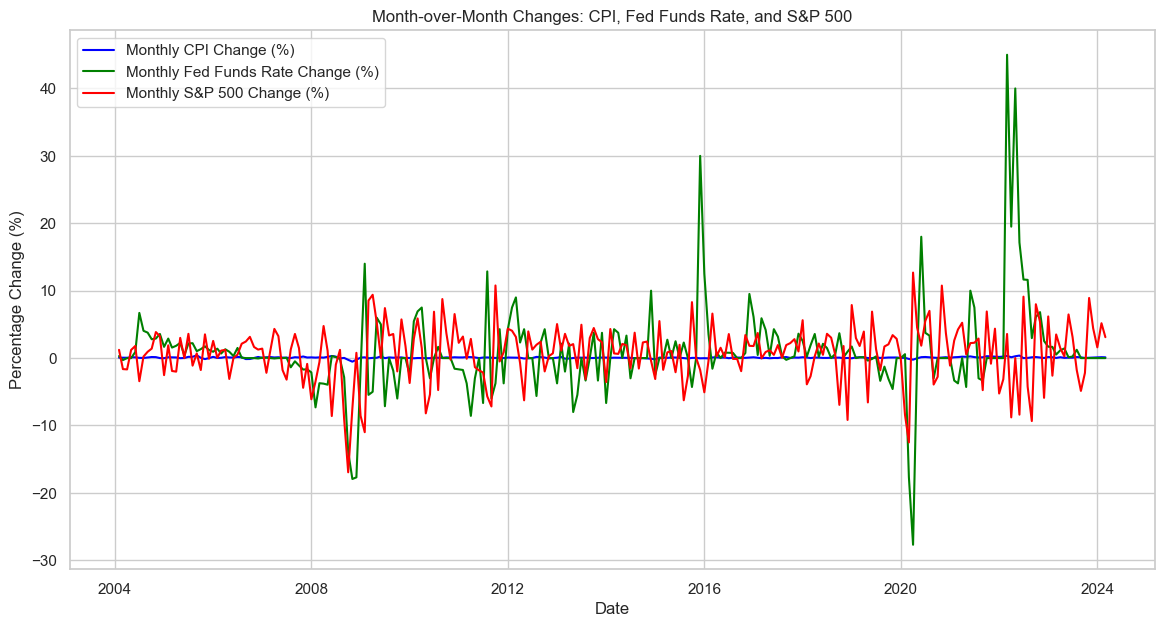

In [18]:
import pandas as pd
import pandas_datareader.data as web
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

sns.set(style="whitegrid")

def fetch_fred_data(symbol, start, end):
    """
    Generalizes data fetching from the FRED database for given symbol
    """
    data = web.DataReader(symbol, "fred", start, end)
    data_monthly = data.pct_change() * 30 # percent change
    data_monthly.columns = [f'{symbol} Change']
    return data_monthly.dropna()

def fetch_sp500_data(start, end):
    """
    Fetches the S&P 500 data from Yahoo Finance using yfinance
    """
    sp500 = yf.download("^GSPC", start=start, end=end, interval="1mo", progress=False)
    sp500_monthly = sp500['Adj Close'].pct_change()*100
    sp500_monthly = sp500_monthly.to_frame(name='S&P 500 Change')
    return sp500_monthly.dropna()

def main():
    start = datetime.datetime(2004, 1, 1)
    end = datetime.datetime.now().strftime('%Y-%m-%d')

    # Fetch data
    cpi_data = fetch_fred_data("CPIAUCSL", start, end)
    fed_funds_data = fetch_fred_data("FEDFUNDS", start, end)
    sp500_data = fetch_sp500_data(start, end)

    # Merge the dataframes on date index
    combined_data = pd.merge(pd.merge(cpi_data, fed_funds_data, left_index=True, right_index=True, how='inner'), sp500_data, left_index=True, right_index=True, how='inner')

    # Plotting the data
    plt.figure(figsize=(14, 7))
    plt.plot(combined_data['CPIAUCSL Change'], label='Monthly CPI Change (%)', color='blue')
    plt.plot(combined_data['FEDFUNDS Change'], label='Monthly Fed Funds Rate Change (%)', color='green')
    plt.plot(combined_data['S&P 500 Change'], label='Monthly S&P 500 Change (%)', color='red')
    plt.title('Month-over-Month Changes: CPI, Fed Funds Rate, and S&P 500')
    plt.xlabel('Date')
    plt.ylabel('Percentage Change (%)')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


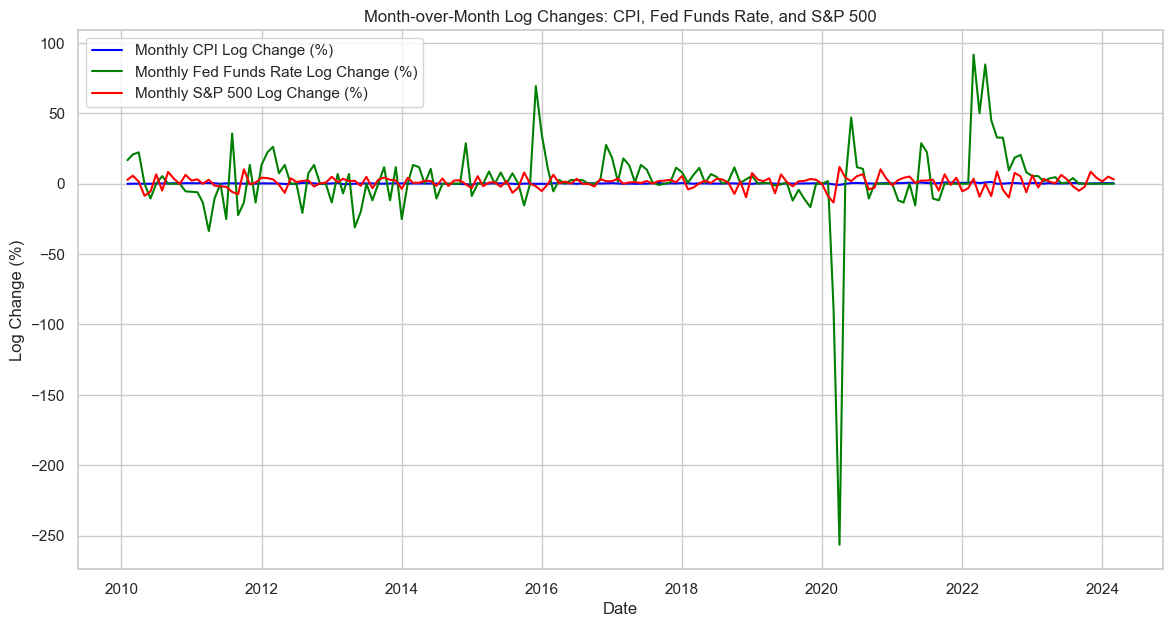

In [16]:
import pandas as pd
import pandas_datareader.data as web
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

sns.set(style="whitegrid")

def fetch_fred_data(symbol, start, end):
    """
    Generalizes data fetching from the FRED database for given symbol
    """
    data = web.DataReader(symbol, "fred", start, end)
    log_data = np.log(data)  # Applying log transformation
    log_data_monthly_change = log_data.diff() * 100  # Monthly log return in percentage terms
    log_data_monthly_change.columns = [f'{symbol} Log Change']
    return log_data_monthly_change.dropna()

def fetch_sp500_data(start, end):
    """
    Fetches the S&P 500 data from Yahoo Finance using yfinance
    """
    sp500 = yf.download("^GSPC", start=start, end=end, interval="1mo", progress=False)
    log_sp500 = np.log(sp500['Adj Close'])  # Applying log transformation
    log_sp500_monthly_change = log_sp500.diff() * 100  # Monthly log return in percentage terms
    log_sp500_monthly_change = log_sp500_monthly_change.to_frame(name='S&P 500 Log Change')
    return log_sp500_monthly_change.dropna()

def main():
    start = datetime.datetime(2010, 1, 1)
    end = datetime.datetime.now().strftime('%Y-%m-%d')

    # Fetch data
    cpi_data = fetch_fred_data("CPIAUCSL", start, end)
    fed_funds_data = fetch_fred_data("FEDFUNDS", start, end)
    sp500_data = fetch_sp500_data(start, end)

    # Merge the dataframes on date index
    combined_data = pd.merge(pd.merge(cpi_data, fed_funds_data, left_index=True, right_index=True, how='inner'), sp500_data, left_index=True, right_index=True, how='inner')

    # Plotting the data
    plt.figure(figsize=(14, 7))
    plt.plot(combined_data['CPIAUCSL Log Change'], label='Monthly CPI Log Change (%)', color='blue')
    plt.plot(combined_data['FEDFUNDS Log Change'], label='Monthly Fed Funds Rate Log Change (%)', color='green')
    plt.plot(combined_data['S&P 500 Log Change'], label='Monthly S&P 500 Log Change (%)', color='red')
    plt.title('Month-over-Month Log Changes: CPI, Fed Funds Rate, and S&P 500')
    plt.xlabel('Date')
    plt.ylabel('Log Change (%)')
    plt.legend()
    plt.show()

if __name__ == "__main__":
    main()


In [31]:
# Load the data
apiUrl = "pro-api.coinmarketcap.com"
api_key = 'f32c7719-7442-41e2-afa1-c119544a54a6'

sym = "BTC-USD"
barSize = "3600"
timeEnd = datetime(2015, 7, 25, 0, 0, 0, 0)
delta = timedelta(hours = 1)
timeStart = timeEnd - (300*delta)
timeEnd = timeEnd.isoformat()
timeStart = timeStart.isoformat()

parameters = {
    "start":timeStart,
    "end":timeEnd,
    "granularity":barSize,
}
data = requests.get(f"{apiUrl}/products/{sym}/candles",
                    params = parameters,
                    headers = {"content-type":"application/json"})
df = pd.DataFrame(data.json(), 
                 columns = ["time", "low", "high","open", "close", "volumn"])

df["date"] = pd.to_datetime(df["time"], unit = 's')
df = df[["date", "close"]]
df

MissingSchema: Invalid URL 'pro-api.coinmarketcap.com/products/BTC-USD/candles': No scheme supplied. Perhaps you meant https://pro-api.coinmarketcap.com/products/BTC-USD/candles?

In [33]:
url = 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': 'b54bcf4d-1bca-4e8e-9a24-22ff2c3d462c',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-04-09T01:09:08.997Z', 'error_code': 0, 'error_message': None, 'elapsed': 1, 'credit_count': 1, 'notice': None}, 'data': [{'id': 5054, 'name': 'doxaet52ekw', 'symbol': 'vssz71epf5', 'slug': '1ynmlaumlx', 'cmc_rank': 4065, 'num_market_pairs': 6235, 'circulating_supply': 9863, 'total_supply': 7939, 'max_supply': 3500, 'infinite_supply': None, 'last_updated': '2024-04-09T01:09:08.997Z', 'date_added': '2024-04-09T01:09:08.997Z', 'tags': ['nr3bk3ckqlk', 'ns1pz83qfhk', 'ldxraxtbny', 'qoea4k24tg', 'lgz3fdeecq', 'ub4n4gakw3', 'whif1ffdl9', 'szfh7k9j49', 'c6afrdlqsp6', 'p2ukcq73y6a'], 'platform': None, 'self_reported_circulating_supply': None, 'self_reported_market_cap': None, 'quote': {'USD': {'price': 0.009390819183559218, 'volume_24h': 5890, 'volume_change_24h': 0.7704093836153114, 'percent_change_1h': 0.5035080700591301, 'percent_change_24h': 0.3176333999947891, 'percent_change_7d': 0.1912357663990214, 'market_cap': 0.7964638072326293, 'market_cap_dominance': 2

In [15]:
# CoinmarketCap API Set up
# Documentation link: https://coinmarketcap.com/api/documentation/v1/#operation/getV1CryptocurrencyMap
cmc_api_key = 'f32c7719-7442-41e2-afa1-c119544a54a6'

# We want to get the top 30 market cap coins
cmc_url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
cmc_url1 = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/historical'

headers = {
    'Accepts': 'application/json',
    'X-CMC_PRO_API_KEY': cmc_api_key
} 

parameters = { 'sort': 'market_cap' , 'start' : 1, 'limit' : 4000}
session = Session() # Create new session object to manage API requests
session.headers.update(headers) #Update the session headers with the specified headers


response = session.get(cmc_url, params=parameters) # Receiving the response from the API

info = json.loads(response.text)
df = pd.json_normalize(info['data'])


In [18]:
df

,name,symbol,quote.USD.market_cap,date_added
0,Bitcoin,BTC,1.329495e+12,2010-07-13T00:00:00.000Z
1,Ethereum,ETH,3.994314e+11,2015-08-07T00:00:00.000Z
2,Tether USDt,USDT,1.066127e+11,2015-02-25T00:00:00.000Z
3,BNB,BNB,8.691794e+10,2017-07-25T00:00:00.000Z
4,Solana,SOL,7.752685e+10,2020-04-10T00:00:00.000Z
...,...,...,...,...
1736,Salad,SALD,1.024156e+06,2023-07-19T09:14:13.000Z
1737,hiDOODLES,HIDOODLES,1.023215e+06,2022-09-23T09:06:41.000Z
1738,Feathercoin,FTC,1.005358e+06,2013-05-03T00:00:00.000Z
1739,Elitium,EUM,1.005067e+06,2019-05-24T00:00:00.000Z


In [17]:
df = df[['name',	'symbol', 'quote.USD.market_cap', 'date_added']]
df = df[df["quote.USD.market_cap"] > 1000000]
df.to_csv("top2000Coins.csv")

In [26]:
historicalData = pd.DataFrame(data, columns=['Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 'Time Open', 'Time High', 'Time Low', 'Time Close'])
start = '01-01-2015'
end = '01-09-2019'
hist = {}


for index, row in df.iterrows():
    sym = row['symbol']
    try:
        if sym not in hist.keys():
            scraper = CmcScraper(sym, start, end)
            s = scraper.get_dataframe()
            hist[sym] = s


SyntaxError: incomplete input (220220733.py, line 13)

In [27]:
len(df)

1741

In [28]:
data = pd.DataFrame(columns=['Symbol','Date', 'Open', 'High', 'Low', 'Close', 'Volume', 'Market Cap', 'Time Open', 'Time High', 'Time Low', 'Time Close'])

for h in hist.keys():
    l = hist[h]
    l['Symbol'] = h
    data = pd.concat([data, l])

In [23]:
data.head()

,Symbol,Date,Open,High,Low,Close,Volume,Market Cap,Time Open,Time High,Time Low,Time Close
0,BTC,2023-12-31,42152.098454,42860.937392,41998.255346,42265.185655,1.639750e+10,8.278112e+11,2023-12-31T00:00:00.000Z,2023-12-31T09:46:00.000Z,2023-12-31T02:53:00.000Z,2023-12-31T23:59:59.999Z
1,BTC,2023-12-30,42091.752644,42584.123640,41556.225992,42156.901150,1.601393e+10,8.256468e+11,2023-12-30T00:00:00.000Z,2023-12-30T16:18:00.000Z,2023-12-30T09:45:00.000Z,2023-12-30T23:59:59.999Z
2,BTC,2023-12-29,42614.643892,43124.325860,41424.060641,42099.402809,2.600002e+10,8.244842e+11,2023-12-29T00:00:00.000Z,2023-12-29T14:43:00.000Z,2023-12-29T22:21:00.000Z,2023-12-29T23:59:59.999Z
3,BTC,2023-12-28,43468.198063,43804.781418,42318.548862,42627.853531,2.299209e+10,8.347916e+11,2023-12-28T00:00:00.000Z,2023-12-28T00:39:00.000Z,2023-12-28T16:28:00.000Z,2023-12-28T23:59:59.999Z
4,BTC,2023-12-27,42518.468528,43683.159808,42167.583486,43442.854558,2.526094e+10,8.507208e+11,2023-12-27T00:00:00.000Z,2023-12-27T22:18:00.000Z,2023-12-27T03:34:00.000Z,2023-12-27T23:59:59.999Z


In [7]:
data.to_csv("Historical_data_backup.csv")

In [29]:
scraper = CmcScraper("BTC")
# get raw data as list of list
headers, data = scraper.get_data()

df_BTC = scraper.get_dataframe()

In [30]:
df_BTC

,Date,Open,High,Low,Close,Volume,Market Cap,Time Open,Time High,Time Low,Time Close
0,2024-04-04,65975.696667,69291.254806,65113.796534,68508.841844,3.443953e+10,1.347932e+12,2024-04-04T00:00:00.000Z,2024-04-04T18:03:00.000Z,2024-04-04T04:24:00.000Z,2024-04-04T23:59:59.999Z
1,2024-04-03,65446.671764,66914.322564,64559.899948,65980.808650,3.448802e+10,1.297904e+12,2024-04-03T00:00:00.000Z,2024-04-03T14:30:00.000Z,2024-04-03T00:39:00.000Z,2024-04-03T23:59:59.999Z
2,2024-04-02,69705.024322,69708.381258,64586.594304,65446.974233,5.070524e+10,1.287439e+12,2024-04-02T00:00:00.000Z,2024-04-02T00:00:00.000Z,2024-04-02T13:34:00.000Z,2024-04-02T23:59:59.999Z
3,2024-04-01,71333.484717,71342.091454,68110.696020,69702.146113,3.487353e+10,1.371141e+12,2024-04-01T00:00:00.000Z,2024-04-01T00:00:00.000Z,2024-04-01T16:01:00.000Z,2024-04-01T23:59:59.999Z
4,2024-03-31,69647.779030,71377.779498,69624.868677,71333.647926,2.005094e+10,1.403108e+12,2024-03-31T00:00:00.000Z,2024-03-31T23:58:00.000Z,2024-03-31T00:01:00.000Z,2024-03-31T23:59:59.999Z
...,...,...,...,...,...,...,...,...,...,...,...
3990,2013-05-02,116.379997,125.599998,92.281898,105.209999,0.000000e+00,1.168517e+09,2013-05-02T00:00:00.000Z,2013-05-02T14:25:01.000Z,2013-05-02T14:30:02.000Z,2013-05-02T23:59:59.999Z
3991,2013-05-01,139.000000,139.889999,107.720001,116.989998,0.000000e+00,1.298955e+09,2013-05-01T00:00:00.000Z,2013-05-01T00:15:01.000Z,2013-05-01T19:55:01.000Z,2013-05-01T23:59:59.999Z
3992,2013-04-30,144.000000,146.929993,134.050003,139.000000,0.000000e+00,1.542813e+09,2013-04-30T00:00:00.000Z,2013-04-30T08:25:02.000Z,2013-04-30T18:55:01.000Z,2013-04-30T23:59:59.999Z
3993,2013-04-29,134.444000,147.488007,134.000000,144.539993,0.000000e+00,1.603769e+09,2013-04-29T00:00:00.000Z,2013-04-29T13:15:01.000Z,2013-04-29T05:20:01.000Z,2013-04-29T23:59:59.999Z
